In [34]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline

In [78]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [53]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [55]:
train_df.describe()
# 38% out of the training-set survived the Titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [77]:
# we might want to drop cabin from the dataset, since 77 % of it are missing

total = train_df.isnull().sum().sort_values(ascending = False)
missing_percent = (train_df.isnull().sum()/train_df.isnull().count()*100)
missing_percent = (round(missing_percent, 1)).sort_values(ascending = False)
missing_data = pd.concat([total, missing_percent], axis=1, keys=['Total', '%'])
print(missing_data)

             Total     %
Cabin          687  77.1
Age            177  19.9
Embarked         2   0.2
Fare             0   0.0
Ticket           0   0.0
Parch            0   0.0
SibSp            0   0.0
Sex              0   0.0
Name             0   0.0
Pclass           0   0.0
Survived         0   0.0
PassengerId      0   0.0


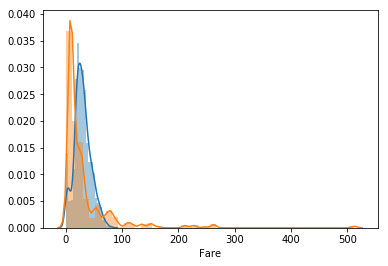

In [57]:
train_df['Sex'].value_counts()
train_df['Pclass'].value_counts()
train_df['SibSp'].value_counts()
train_df['Parch'].value_counts()
train_df['Embarked'].value_counts()

sns.distplot(train_df.Age.dropna(), kde = True)
sns.distplot(train_df.Fare, kde = True)

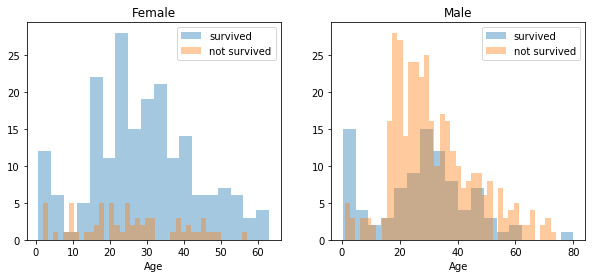

In [58]:
# men have a high probability of survival when they are between 18 and 30 years old.
# For women the survival chances are higher between 14 and 40
# For men the probability of survival is very low between the age of 5 and 18
# infants also have a little bit higher probability of survival
# certain ages, which have increased odds of survival, so groups can be formed

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))

women = train_df[train_df['Sex'] == "female"]
men = train_df[train_df['Sex'] == "male"]

ax = sns.distplot(women[women['Survived'] == 1].Age.dropna(), bins = 18, label = 'survived', ax = axes[0], kde = False)
ax = sns.distplot(women[women['Survived'] == 0].Age.dropna(), bins = 40, label = 'not survived', ax = axes[0], kde = False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived'] == 1].Age.dropna(), bins = 18, label = 'survived', ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived'] == 0].Age.dropna(), bins = 40, label = 'not survived', ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

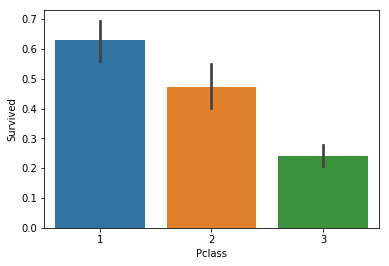

In [59]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

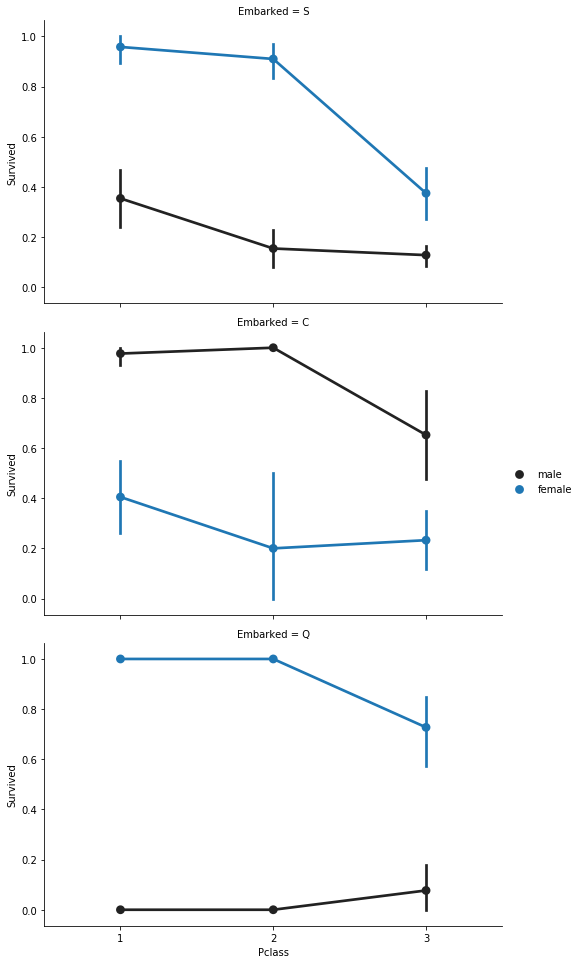

In [60]:
# Women on port Q and on port S have a higher chance of survival. 
# The inverse is true, if they are at port C

grid = sns.FacetGrid(train_df, row='Embarked', height=4.5, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
grid.add_legend()

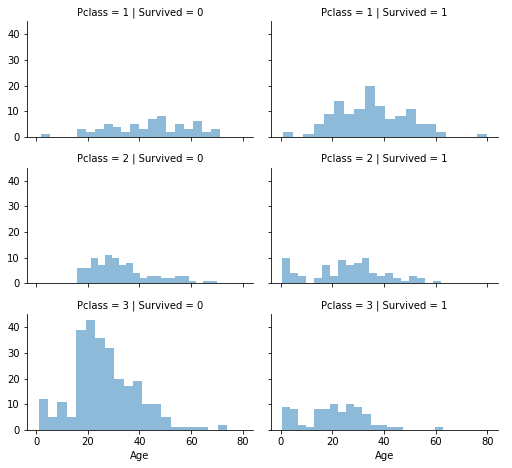

In [61]:
# high probability that a person in pclass 3 will not survive

grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [79]:
# SibSp and Parch combined to know whether a person alone or not

data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 1
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 0
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df.not_alone.value_counts()

0    537
1    354
Name: not_alone, dtype: int64

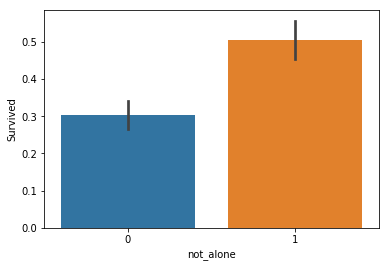

In [63]:
sns.barplot(x='not_alone', y='Survived', data=train_df)

In [80]:
train_df = train_df.drop(['PassengerId'], axis = 1)
test_df = test_df.drop(['PassengerId'], axis = 1)
train_df = train_df.drop(['Ticket'], axis = 1)
test_df = test_df.drop(['Ticket'], axis = 1)

In [81]:
# A cabin number looks like ‘C123’ and the letter refers to the deck. 
# Therefore we’re going to extract these and create a new feature, that contains a person's deck

import re

deck = {"A":1, "B":2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
    
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)
train_df.head(n = 8)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,1,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,1,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,0,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,1,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,0,8
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,0,0,8
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,0,0,5
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,4,1,8


In [82]:
# Compute missing values for Age
# array that contains random numbers, which are computed based on the mean in regards to std

data = [train_df, test_df]

for dataset in data:
    mean = train_df['Age'].mean()
    std = test_df['Age'].std()
    is_null = dataset['Age'].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

train_df['Age'].isnull().sum()

0

In [83]:
# Embarked feature has only 2 missing values, we will fill these with the most common one

common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [84]:
# Converting Fare to Integer

data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [85]:
# Converting Sex to numeric

data = [train_df, test_df]
genders = {'male': 0, 'female': 1}

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [86]:
# Converting Embarked to numeric

ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [87]:
# Mapping Name Titles

data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # space with more than 1 character till .
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
    
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    dataset['Title'] = dataset['Title'].map(titles)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [88]:
quantile_list = [0, .14, .28, .42, .56, .70, .84, 1.]
quantiles = train_df['Age'].quantile(quantile_list)
quantiles

0.00     0.0
0.14    17.0
0.28    22.0
0.42    25.0
0.56    30.0
0.70    35.0
0.84    42.0
1.00    80.0
Name: Age, dtype: float64

In [89]:
# Infants survive, 18-40 in women survive and 20-30 in men survive 

data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 17), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 17) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 26), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 30), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 42), 'Age'] = 5
    dataset.loc[dataset['Age'] > 42, 'Age'] = 6

# let's see how it's distributed 
train_df['Age'].value_counts()

5    239
2    153
6    129
4    119
3    119
0     68
1     64
Name: Age, dtype: int64

In [90]:
train_df = train_df.drop(['SibSp'], axis = 1)
train_df = train_df.drop(['Parch'], axis = 1)
train_df = train_df.drop(['Fare'], axis = 1)
train_df = train_df.drop(['not_alone'], axis = 1)
train_df = train_df.drop(['Title'], axis = 1)

test_df = test_df.drop(['SibSp'], axis = 1)
test_df = test_df.drop(['Parch'], axis = 1)
test_df = test_df.drop(['Fare'], axis = 1)
test_df = test_df.drop(['not_alone'], axis = 1)
test_df = test_df.drop(['Title'], axis = 1)

train_df.head()


,Survived,Pclass,Sex,Age,Embarked,relatives,Deck
0,0,3,0,2,0,1,8
1,1,1,1,5,1,1,3
2,1,3,1,3,0,0,8
3,1,1,1,5,0,1,3
4,0,3,0,5,0,0,8


In [91]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test = test_df.copy()

In [92]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_prediction = logreg.predict(X_train)

print(classification_report(Y_train, Y_prediction))
print(confusion_matrix(Y_train, Y_prediction))


              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.75      0.70      0.73       342

   micro avg       0.80      0.80      0.80       891
   macro avg       0.79      0.78      0.78       891
weighted avg       0.79      0.80      0.80       891

[[471  78]
 [103 239]]


C:\Users\admn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [93]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)
Y_prediction = svc.predict(X_train)

print(classification_report(Y_train, Y_prediction))
print(confusion_matrix(Y_train, Y_prediction))


              precision    recall  f1-score   support

           0       0.86      0.88      0.87       549
           1       0.80      0.77      0.79       342

   micro avg       0.84      0.84      0.84       891
   macro avg       0.83      0.83      0.83       891
weighted avg       0.84      0.84      0.84       891

[[484  65]
 [ 78 264]]


C:\Users\admn\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [94]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_prediction = knn.predict(X_train)

print(classification_report(Y_train, Y_prediction))
print(confusion_matrix(Y_train, Y_prediction))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       549
           1       0.84      0.77      0.80       342

   micro avg       0.86      0.86      0.86       891
   macro avg       0.85      0.84      0.84       891
weighted avg       0.85      0.86      0.85       891

[[498  51]
 [ 78 264]]


In [95]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_prediction = decision_tree.predict(X_train)

print(classification_report(Y_train, Y_prediction))
print(confusion_matrix(Y_train, Y_prediction))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       549
           1       0.94      0.78      0.85       342

   micro avg       0.89      0.89      0.89       891
   macro avg       0.91      0.87      0.88       891
weighted avg       0.90      0.89      0.89       891

[[531  18]
 [ 76 266]]


In [96]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_train)

print(classification_report(Y_train, Y_prediction))
print(confusion_matrix(Y_train, Y_prediction))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       549
           1       0.91      0.80      0.85       342

   micro avg       0.89      0.89      0.89       891
   macro avg       0.90      0.88      0.89       891
weighted avg       0.90      0.89      0.89       891

[[523  26]
 [ 68 274]]


In [97]:
from sklearn.model_selection import cross_val_score

rfc_eval = cross_val_score(estimator = random_forest, X = X_train, y = Y_train, cv = 10)
rfc_eval.mean()

0.8070996481670638